In [1]:
import numpy
import math

In [2]:
def cartesian_distance(point1, point2):
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return distance

In [3]:
def spherical_distance(point1, point2):
    r1, az1, el1 = point1
    r2, az2, el2 = point2

    delta_theta = az2 - az1

    d = math.sqrt(
        r1**2 + r2**2 - 2*r1*r2*(math.sin(el1)*math.sin(el2)*math.cos(delta_theta) + math.cos(el1)*math.cos(el2))
    )

    return d

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

In [5]:
micone = (0.042, 45, 35)
mictwo = (0.042, -45, -35)
micthree = (0.042, 135, -35)
micfour = (0.042, -135, 35)

arbritrary = (0.05, 45, 45)
center = (0,0,0)

#330 m/s

distance1 = spherical_distance(micone, arbritrary)
distance2 = spherical_distance(mictwo, arbritrary)
distance3 = spherical_distance(micthree, arbritrary)
distance4 = spherical_distance(micfour, arbritrary)

relative1 = distance1 - 0.042
relative2 = distance2 - 0.042
relative3 = distance3 - 0.042
relative4 = distance4 - 0.042

relative_time = (relative1/330, relative2/330, relative3/330, relative4/330)
print(relative_time)

(0.00014015216623014743, 0.0001252357575022705, 0.0001252357575022705, 9.421066146749208e-05)


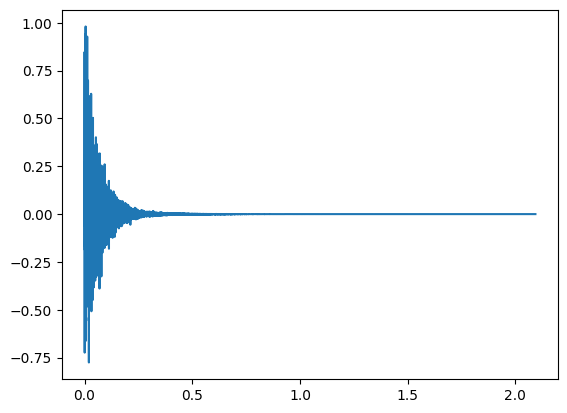

In [6]:
ir, sr = lr.load("mono_ir.wav")
t = np.arange(len(ir))/sr #time labels of each sample (in seconds)
plt.plot(t, ir) #plot sample
Audio(data=ir, rate=sr) #playback audio

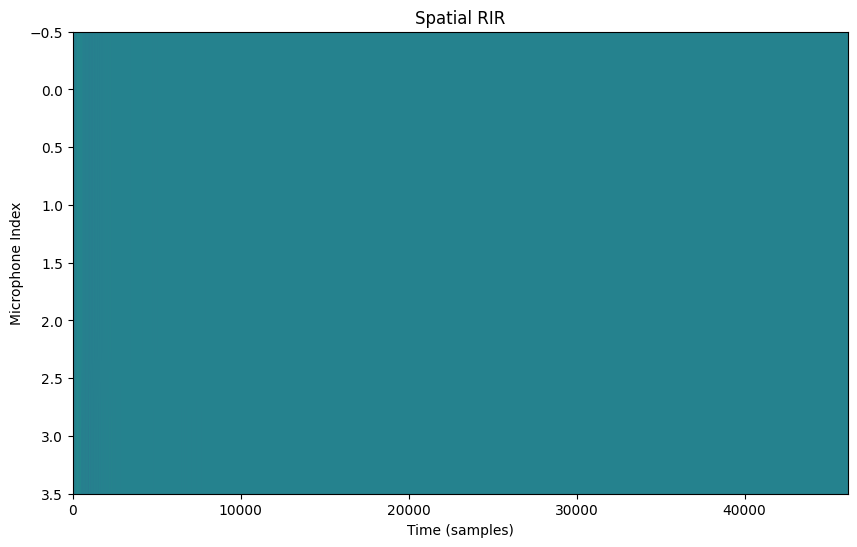

In [7]:
#rir_delay.spherical_distance(m1_coords, m2_coords)
m1_coords = [0.042, 45, 35]
m2_coords = [0.042, -45, -35]
m3_coords = [0.042, 135, -35]
m4_coords = [0.042, -135, 35]

mic_coords = [m1_coords, m2_coords, m3_coords, m4_coords]

def distance_to_seconds(distance):
    '''
    compute the time it takes sound to travel
    a distance in seconds
    '''
    #CODE HERE
    seconds = distance/330
    return seconds

def shift_ir(ir, delay):
    '''
    takes an IR and shifts it a certain number
    of samples based on argument 'delay'
    '''
    #CODE

    if delay < 0:
        raise ValueError("Delay should be a non-negative integer.")
    if not ir.any:
        raise ValueError("Input IR should not be empty.")
    shifted_ir = np.concatenate((np.zeros(delay), ir[:-delay]))
    return shifted_ir

def spatial_rir(mono_ir, sr, mic_positions, source_position):
    # Function to create a spatial RIR from a mono-channel IR

    # Number of microphones
    num_mics = len(mic_positions)

    # Compute distances between the source and each microphone
    distances = [cartesian_distance(source_position, mic_pos) for mic_pos in mic_positions]

    # Convert distances to delays (in samples)
    speed_of_sound = 343  # Speed of sound in meters per second
    delays = [int(np.round(dist / speed_of_sound * sr)) for dist in distances]

    # Apply delays to the mono-channel IR
    delayed_ir = [shift_ir(mono_ir, delay) for delay in delays]

    # Concatenate delayed IRs into a multi-channel signal
    spatial_rir = np.vstack(delayed_ir)

    return spatial_rir

# Load mono-channel IR and sample rate
mono_ir, sr = lr.load("mono_ir.wav")

# Define microphone positions and source position (example positions)
mic_positions = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 1]])
source_position = np.array([2, 2, 2])

# Create spatial RIR
spatial_rir_result = spatial_rir(mono_ir, sr, mic_positions, source_position)

# Plot and listen to the spatial RIR
plt.figure(figsize=(10, 6))
plt.imshow(spatial_rir_result, aspect='auto', cmap='viridis')
plt.title('Spatial RIR')
plt.xlabel('Time (samples)')
plt.ylabel('Microphone Index')

Audio(data=spatial_rir_result, rate = sr)

(4, 46149)


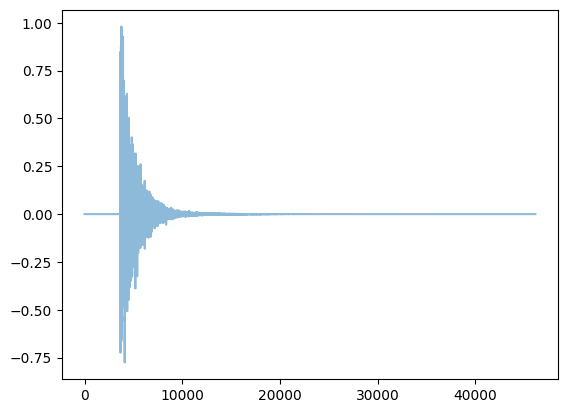

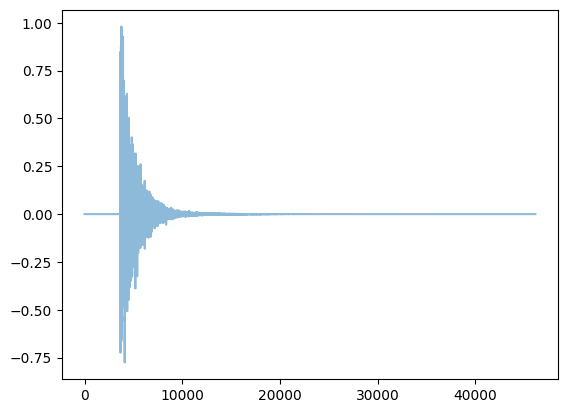

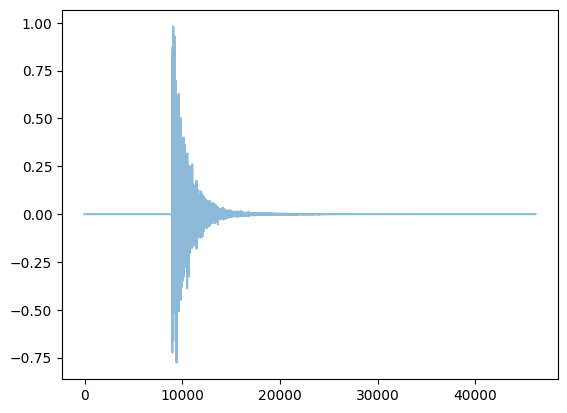

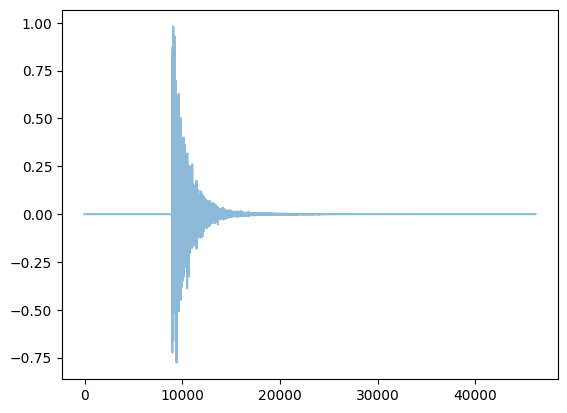

In [8]:
m1_coords = [0.042, 45, 35]
m2_coords = [0.042, -45, -35]
m3_coords = [0.042, 135, -35]
m4_coords = [0.042, -135, 35]

mic_coords = [m1_coords, m2_coords, m3_coords, m4_coords]

source = [0,0,0]

spr = spatial_rir(mono_ir, sr, mic_coords, source)
t = np.arange(len(spr))/sr #time labels of each sample (in seconds)

for i in range(4):
  plt.figure()
  plt.plot(spr[i], alpha = 0.5)
#plt.plot(spr[0]) #plot sample
Audio(data=spr, rate=sr) #playback audio

print(spr.shape)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

2401
[   1 -360 -360]


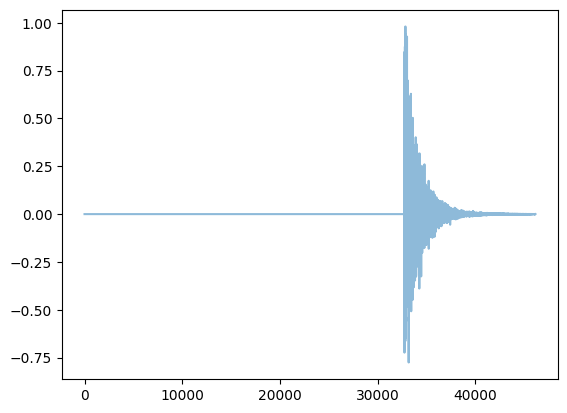

In [22]:
#DELAY FROM POINTS AROUND CIRCLE (15 DEGREE INCREMENTS)
#USE LIBROSA TO DISPLAY AUDIO

coordinates = []

for x in range(-360, 361, 15):
    for y in range(-360, 361, 15):
        coordinates.append([1, x, y])

coordinates = np.array(coordinates)
print(len(coordinates))

source = [0,0,0]

spr = spatial_rir(mono_ir, sr, coordinates, source)
t = np.arange(len(spr))/sr #time labels of each sample (in seconds)

print(coordinates[0])
plt.figure()
plt.plot(spr[0], alpha = 0.5)
Audio(data = spr[0], rate = sr)